In [ ]:
# pip install Pillow

  Using cached pillow-11.3.0-cp311-cp311-win_amd64.whl.metadata (9.2 kB)
Using cached pillow-11.3.0-cp311-cp311-win_amd64.whl (7.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from PIL import Image
import os

def preprocess_and_rename(source_folder, output_folder, prefix, size=(360, 360)):
    os.makedirs(output_folder, exist_ok=True)
    count = 1

    for filename in sorted(os.listdir(source_folder)):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
            file_path = os.path.join(source_folder, filename)
            try:
                with Image.open(file_path) as img:
                    img = img.convert("RGB")            # Convert to RGB
                    img = img.resize(size)              # Resize to 360x360

                    # Create standardized new filename
                    new_filename = f"{prefix}_{count}.jpg"
                    new_path = os.path.join(output_folder, new_filename)

                    img.save(new_path, format="JPEG", quality=95)
                    print(f"{new_filename}")
                    count += 1
            except Exception as e:
                print(f"{filename} — {e}")

# Apply to both datasets
preprocess_and_rename("data/Real", "clean_dataset/Real", prefix="real")
preprocess_and_rename("data/Ai_generated", "clean_dataset/Ai_generated", prefix="ai")


real_1.jpg
real_2.jpg
real_3.jpg
real_4.jpg
real_5.jpg
real_6.jpg
real_7.jpg
real_8.jpg
real_9.jpg
real_10.jpg
real_11.jpg
real_12.jpg
real_13.jpg
real_14.jpg
real_15.jpg
real_16.jpg
real_17.jpg
real_18.jpg
real_19.jpg
real_20.jpg
real_21.jpg
real_22.jpg
real_23.jpg
real_24.jpg
real_25.jpg
real_26.jpg
real_27.jpg
real_28.jpg
real_29.jpg
real_30.jpg
real_31.jpg
real_32.jpg
real_33.jpg
real_34.jpg
real_35.jpg
real_36.jpg
real_37.jpg
real_38.jpg
real_39.jpg
real_40.jpg
real_41.jpg
real_42.jpg
real_43.jpg
real_44.jpg
real_45.jpg
real_46.jpg
real_47.jpg
real_48.jpg
real_49.jpg
real_50.jpg
real_51.jpg
real_52.jpg
real_53.jpg
real_54.jpg
real_55.jpg
real_56.jpg
real_57.jpg
real_58.jpg
real_59.jpg
real_60.jpg
real_61.jpg
real_62.jpg
real_63.jpg
real_64.jpg
real_65.jpg
real_66.jpg
real_67.jpg
real_68.jpg
real_69.jpg
real_70.jpg
real_71.jpg
real_72.jpg
real_73.jpg
real_74.jpg
real_75.jpg
real_76.jpg
real_77.jpg
real_78.jpg
real_79.jpg
real_80.jpg
real_81.jpg
real_82.jpg
real_83.jpg
real_84.jpg
r

In [ ]:
#pip install tensorflow matplotlib scikit-learn

Object `pip install tensorflow matplotlib scikit-learn` not found.


In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Set up constants
BATCH_SIZE = 32
IMG_SIZE = (360, 360)
DATA_DIR = "clean_dataset"

# Load data from folder
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("Classes:", class_names)  # ['Ai_generated', 'Real']


Found 1919 files belonging to 2 classes.
Using 1536 files for training.
Found 1919 files belonging to 2 classes.
Using 383 files for validation.
Classes: ['Ai_generated', 'Real']


In [17]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(500).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=IMG_SIZE + (3,),
                      include_top=False,
                      weights='imagenet')
base_model.trainable = False  # Freeze base

# Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=5)

Epoch 1/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 451s 9s/step - accuracy: 0.9526 - loss: 0.1221 - val_accuracy: 0.9739 - val_loss: 0.0614
Epoch 2/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 414s 9s/step - accuracy: 0.9818 - loss: 0.0626 - val_accuracy: 0.9530 - val_loss: 0.0997
Epoch 3/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 423s 9s/step - accuracy: 0.9738 - loss: 0.0681 - val_accuracy: 0.9869 - val_loss: 0.0246
Epoch 4/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 411s 9s/step - accuracy: 0.9892 - loss: 0.0324 - val_accuracy: 0.9869 - val_loss: 0.0286
Epoch 5/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 410s 9s/step - accuracy: 0.9943 - loss: 0.0236 - val_accuracy: 0.9896 - val_loss: 0.0287


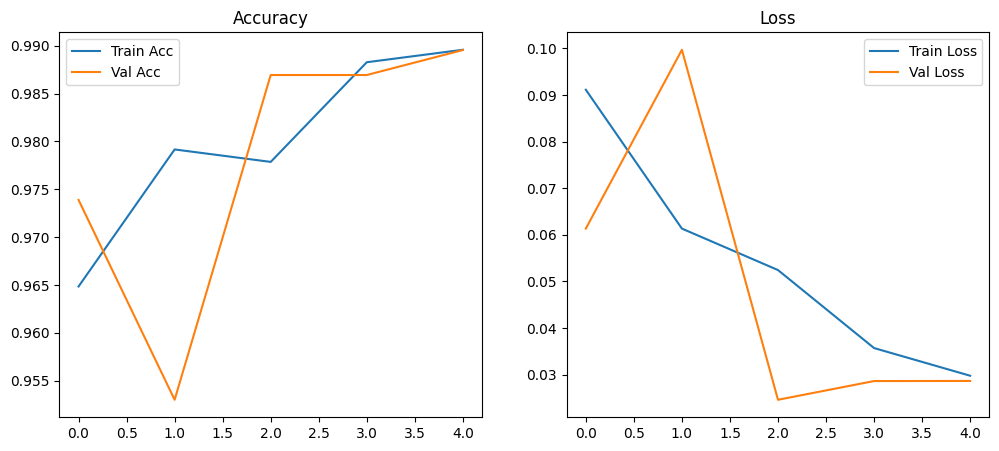

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Acc')
plt.plot(epochs_range, val_acc, label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [23]:
model.save("ai_vs_real_model.h5")

In [49]:
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    preds_binary = (preds > 0.5).astype(int)
    print("Ground truth: ", labels.numpy())
    print("Predictions:  ", preds_binary.reshape(-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
Ground truth:  [0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1]
Predictions:   [0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1]


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


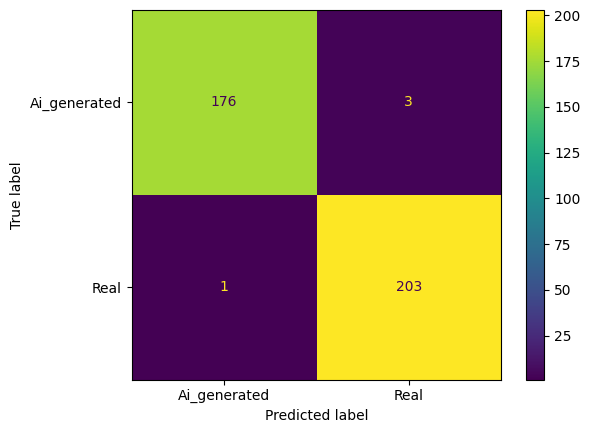

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    preds_binary = (preds > 0.5).astype(int)
    y_true.extend(labels.numpy())
    y_pred.extend(preds_binary.reshape(-1))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
